# Generative Adversarial Networks

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import IPython.display as ipyd
from skimage.transform import resize
from skimage import data
from scipy.misc import imresize
from scipy.ndimage.filters import gaussian_filter
from libs import utils, gif, datasets, dataset_utils, nb_utils
plt.style.use('ggplot')
%matplotlib inline

In [4]:
from libs.datasets import CELEB
files = CELEB()

### Creating Input Pipelines

In [6]:
from libs.dataset_utils import create_input_pipeline
batch_size = 100
n_epochs = 10
input_shape = [218, 178,3]
crop_shape = [64, 64, 3]
crop_factor = 0.8
batch = create_input_pipeline(
    files = files,
    batch_size = batch_size, n_epochs = n_epochs,
    crop_shape = crop_shape,
    crop_factor = crop_factor,
    shape = input_shape
)

In [8]:
sess = tf.Session()
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

(100, 64, 64, 3)
Batch_xs type: float32 Max value in Batch_xs: 255.0


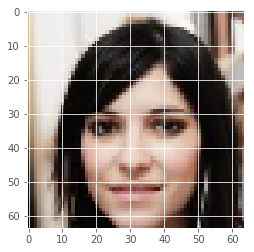

In [9]:
batch_xs = sess.run(batch)
print(batch_xs.shape)
print("Batch_xs type:",batch_xs.dtype,"Max value in Batch_xs:",np.max(batch_xs))
plt.imshow(batch_xs[0]/255.0)